<a href="https://colab.research.google.com/github/ShrutiPatel263/AeroCare/blob/main/1st_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [ ]:
dftrain = pd.read_csv('drive/MyDrive/archive/CMaps/train_FD002.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('drive/MyDrive/archive/CMaps/test_FD002.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('drive/MyDrive/archive/CMaps/RUL_FD002.txt',sep=r'\s+',header=None,index_col=False,names=['RUL'])

In [ ]:
dfvalid.shape

(33991, 26)

In [ ]:
dftrain.shape

(53759, 26)

In [ ]:
train=dftrain.copy()
valid=dfvalid.copy()

In [ ]:
train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [ ]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (53759, 26)
Shape of the validation dataset :  (33991, 26)
Percentage of the validation dataset :  0.38736182336182334


In [ ]:
train.isnull().sum()

,0
unit_number,0
time_cycles,0
setting_1,0
setting_2,0
setting_3,0
s_1,0
s_2,0
s_3,0
s_4,0
s_5,0


In [ ]:
train.loc[:,['unit_number','time_cycles']].describe()

,unit_number,time_cycles
count,53759.000000,53759.000000
mean,131.082981,109.154746
std,74.463862,69.180569
min,1.000000,1.000000
25%,68.000000,52.000000
50%,131.000000,104.000000
75%,195.000000,157.000000
max,260.000000,378.000000


In [ ]:
train.loc[:,'s_1':].describe()

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,472.910207,579.672399,1419.971013,1205.442024,8.031986,11.600746,282.606787,2228.879188,8525.200837,1.094962,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,26.389707,37.289399,105.946341,119.123428,3.613839,5.431802,146.005306,145.209816,335.812013,0.127469,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,445.000000,535.530000,1243.730000,1023.770000,3.910000,5.710000,136.800000,1914.770000,7985.560000,0.930000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,445.000000,549.570000,1352.760000,1123.655000,3.910000,5.720000,139.935000,2211.880000,8321.660000,1.020000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,462.540000,555.980000,1369.180000,1138.890000,7.050000,9.030000,194.660000,2223.070000,8361.200000,1.020000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,491.190000,607.340000,1499.370000,1306.850000,10.520000,15.490000,394.080000,2323.960000,8778.030000,1.260000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,518.670000,644.520000,1612.880000,1439.230000,14.620000,21.610000,555.820000,2388.390000,9215.660000,1.300000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


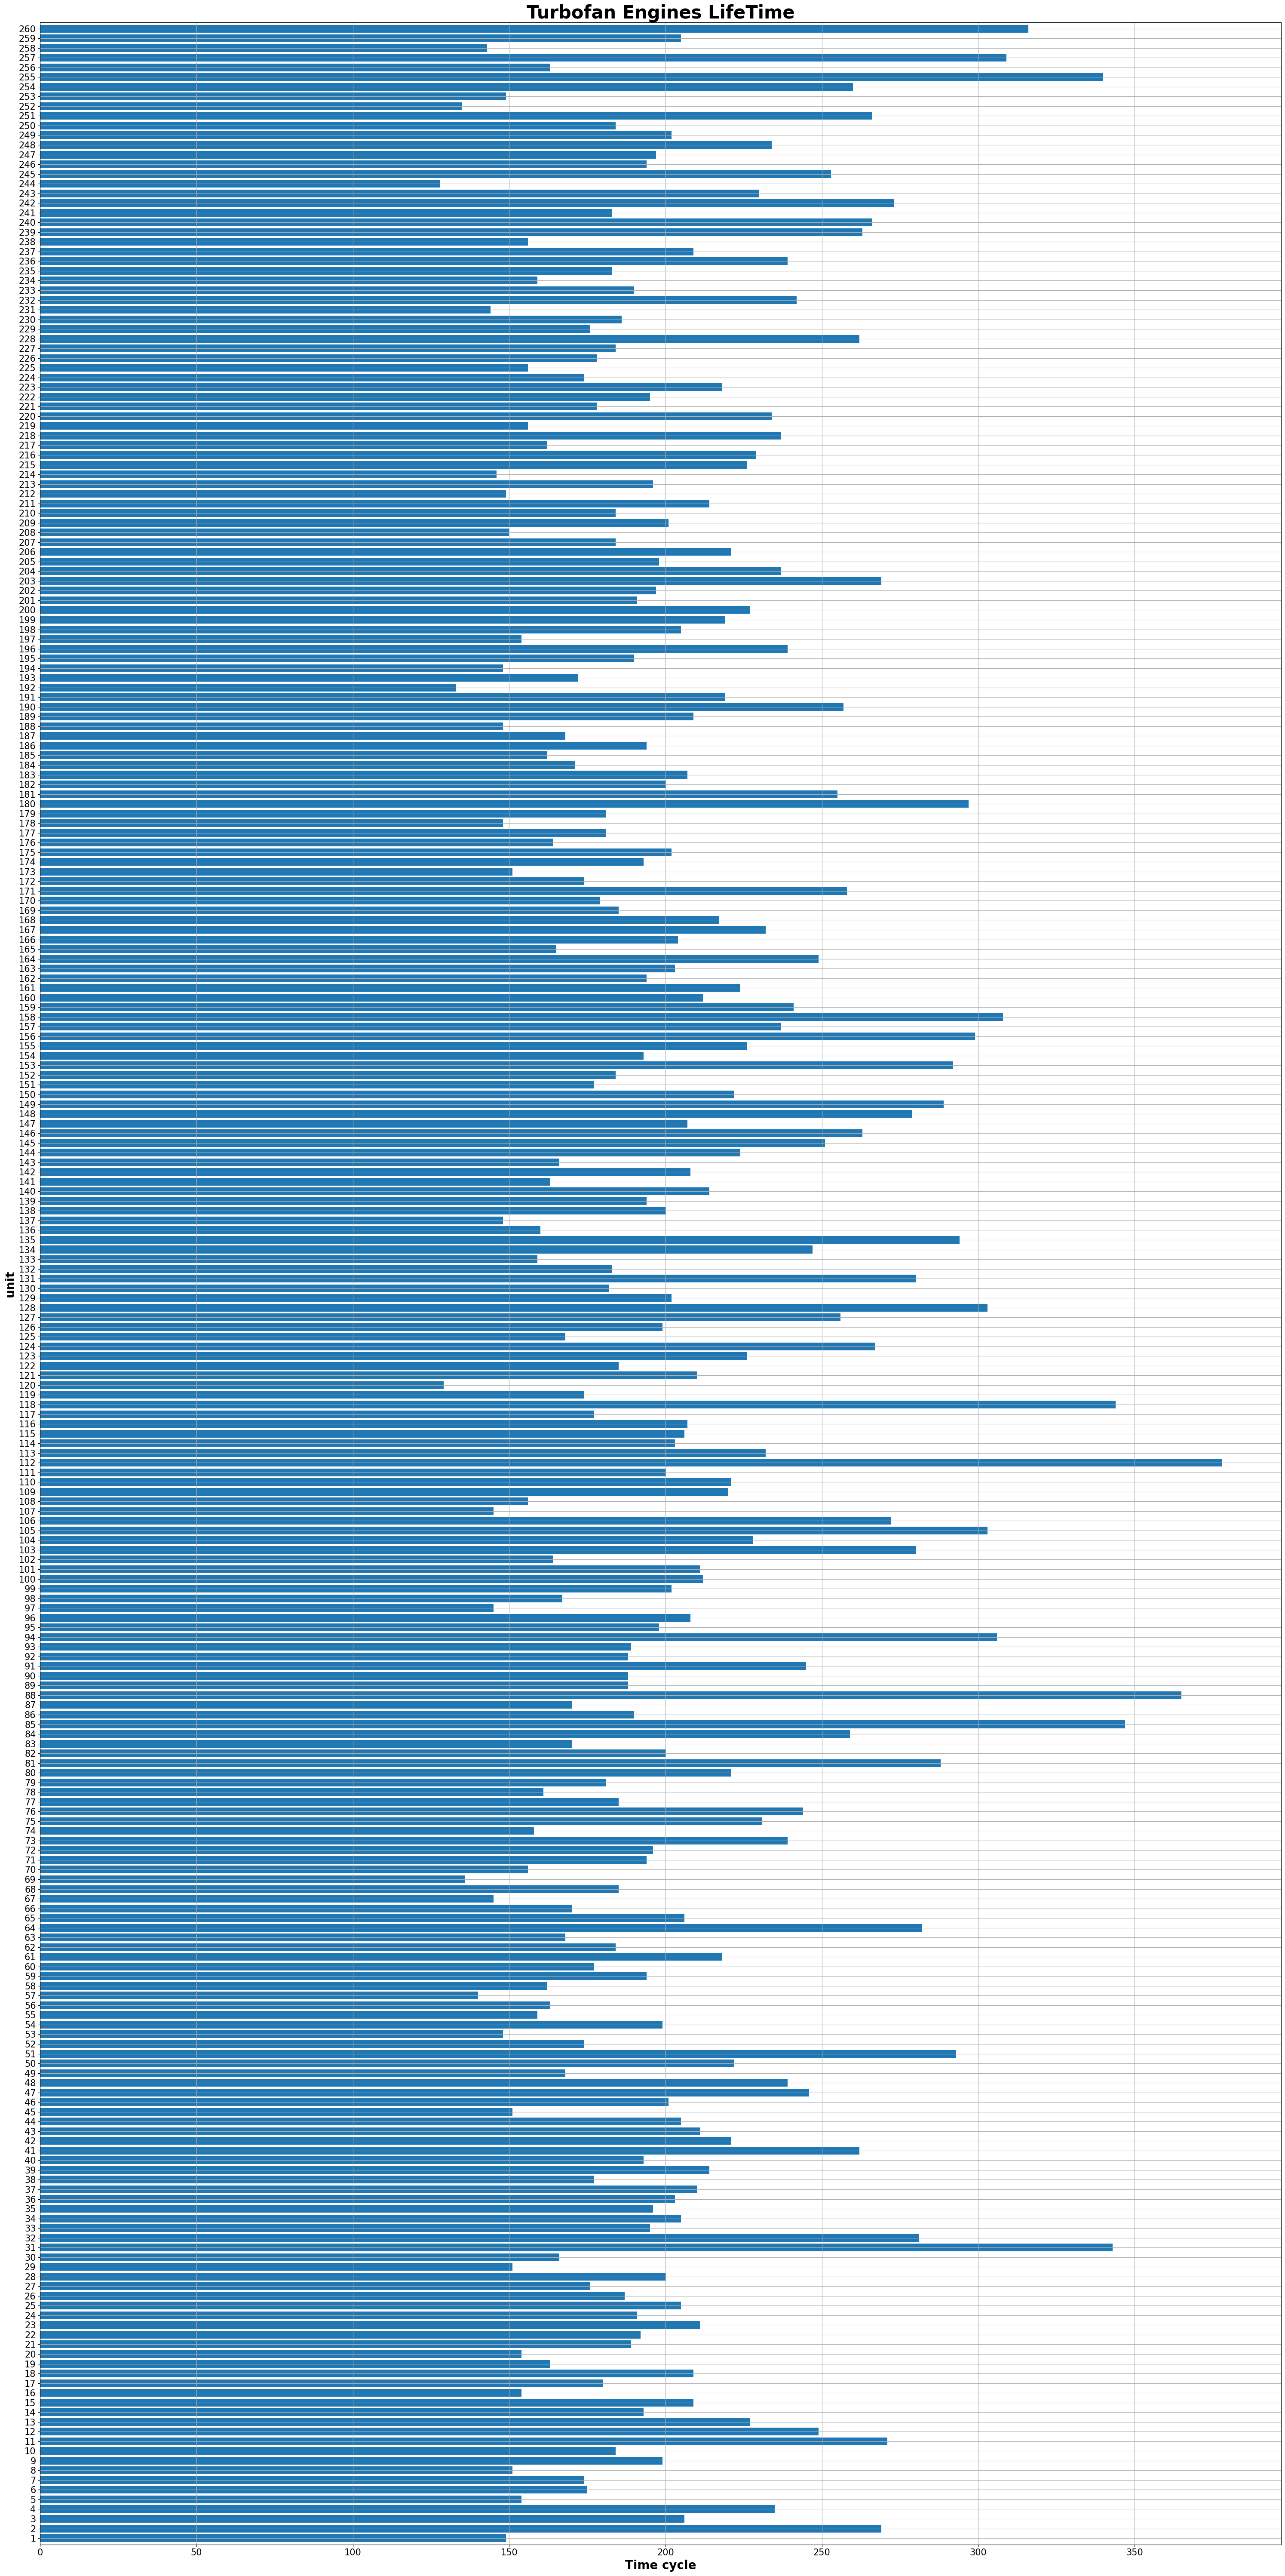

In [ ]:
##Maximum time cycle for each unit

max_time_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(30,60))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444459, 'max time cycle')

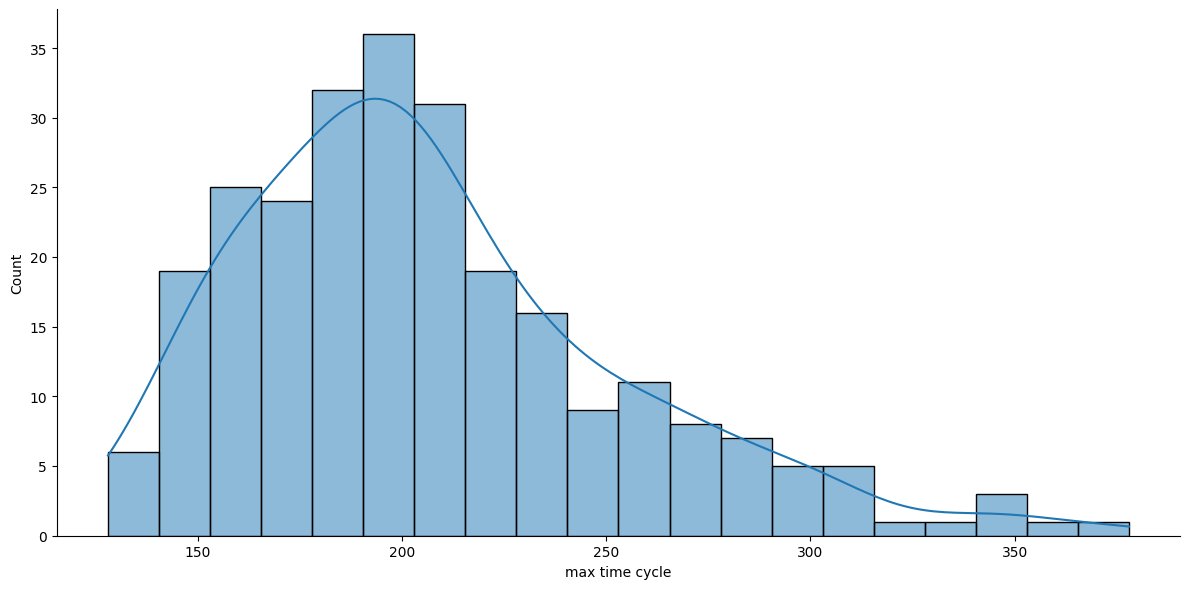

In [ ]:
#Distribution of maximum time cycles
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

In [ ]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number')
    max_time_cycles = train_grouped_by_unit['time_cycles'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [ ]:
train = add_RUL_column(train)

In [ ]:
train[['unit_number','RUL']]


,unit_number,RUL
0,1,148
1,1,147
2,1,146
3,1,145
4,1,144
...,...,...
53754,260,4
53755,260,3
53756,260,2
53757,260,1


In [ ]:
train['unit_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
unit_2=np.where(train['unit_number']==1)

In [ ]:
unit_2

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148]),)

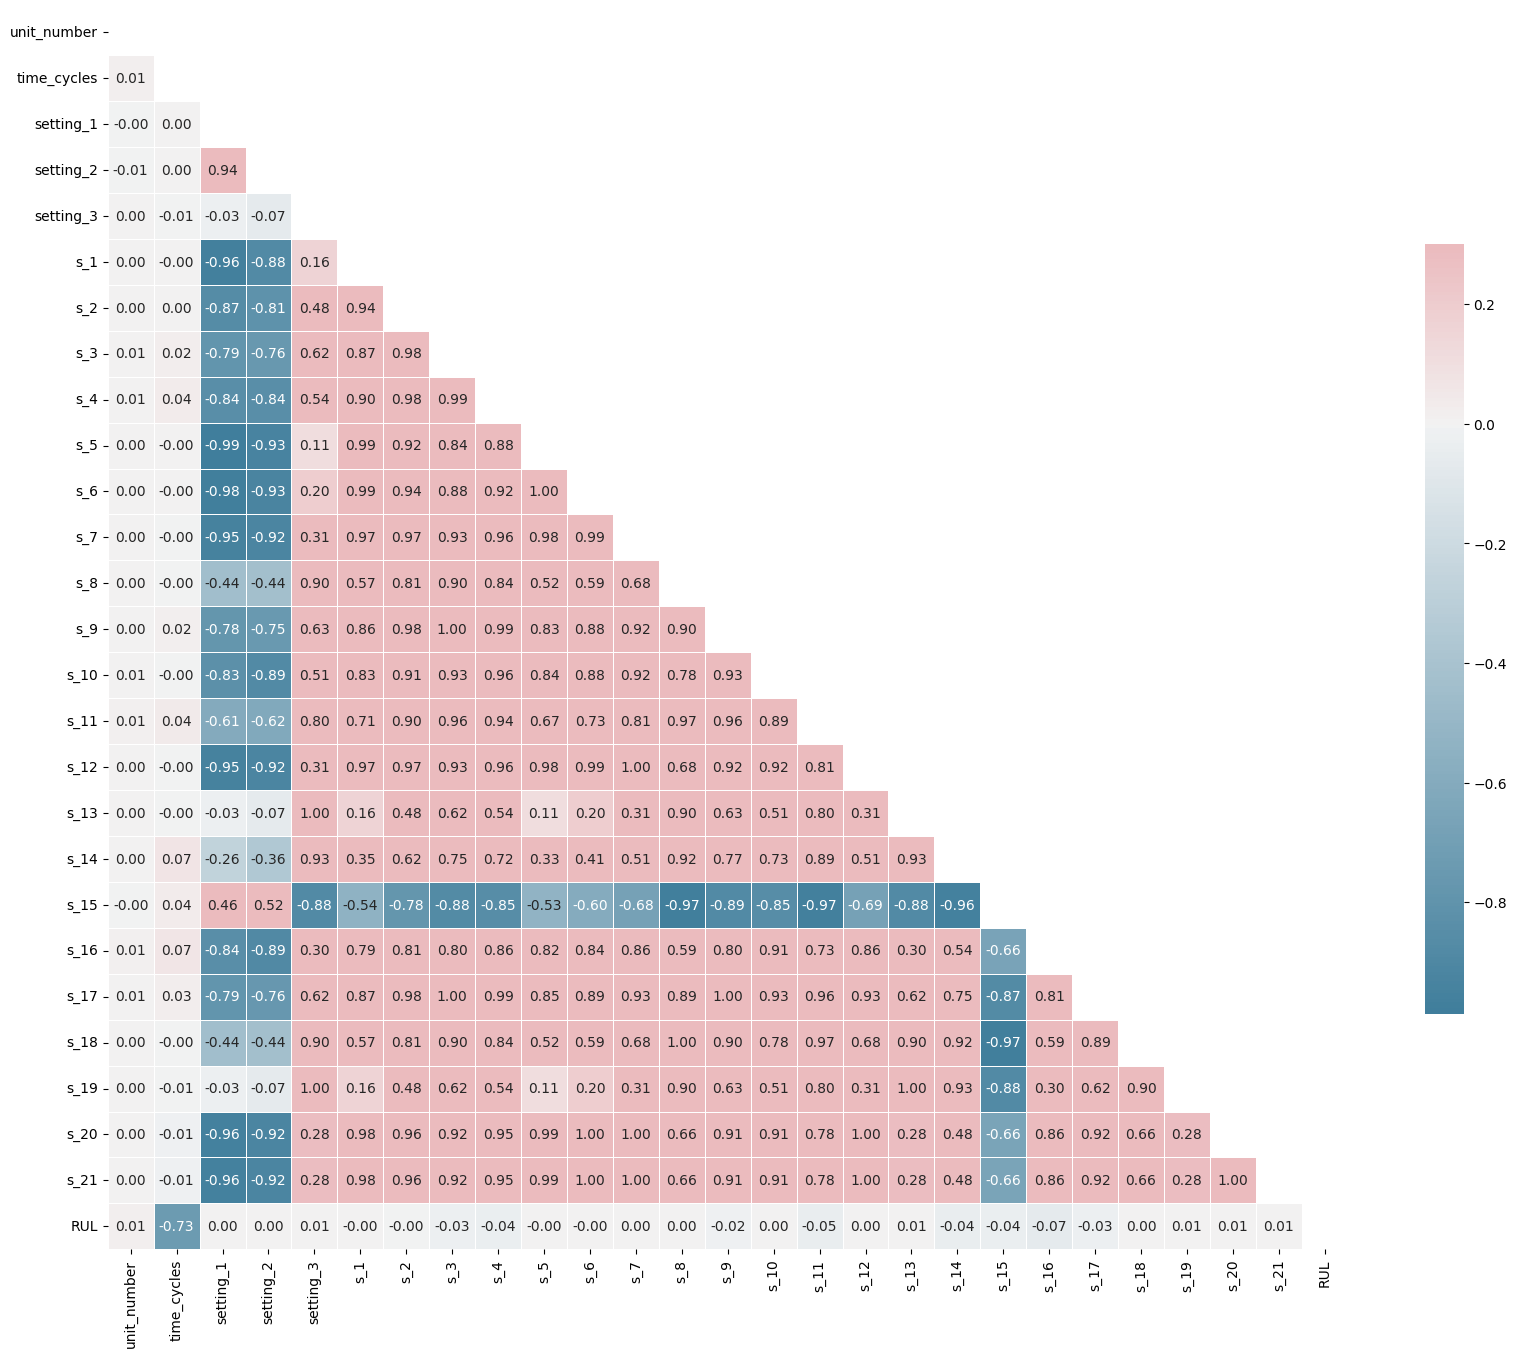

In [ ]:

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap with annotation
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True,           # <- Add this line
    fmt=".2f"             # <- Format the numbers to 2 decimal places
)

plt.show()


In [ ]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

In [ ]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()

In [ ]:
for i in range(1,22):
    try:
        plot_signal(train, Sensor_dictionary,'s_'+str(i))
    except:
        pass

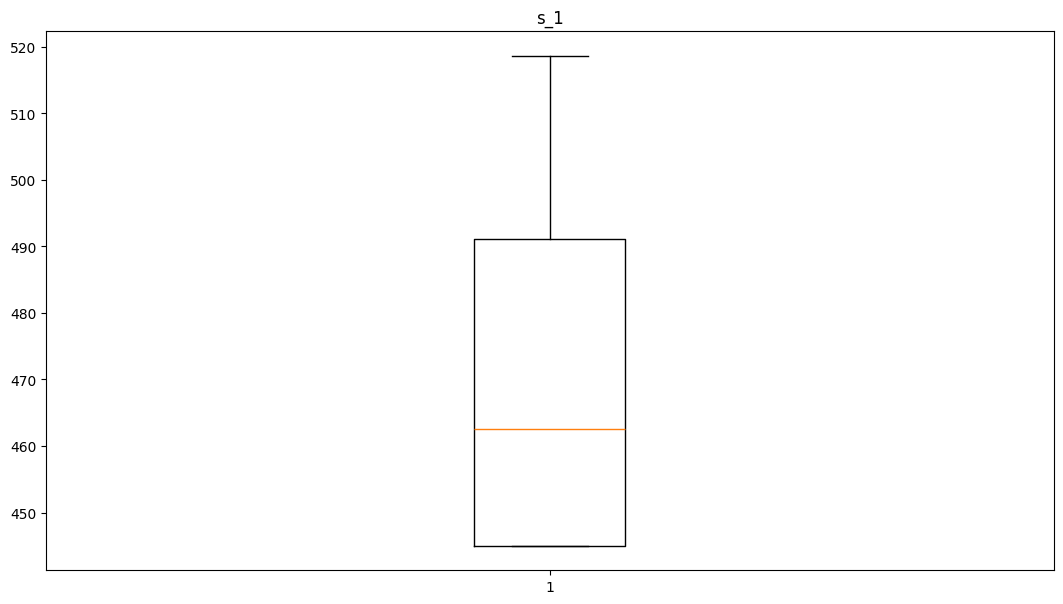

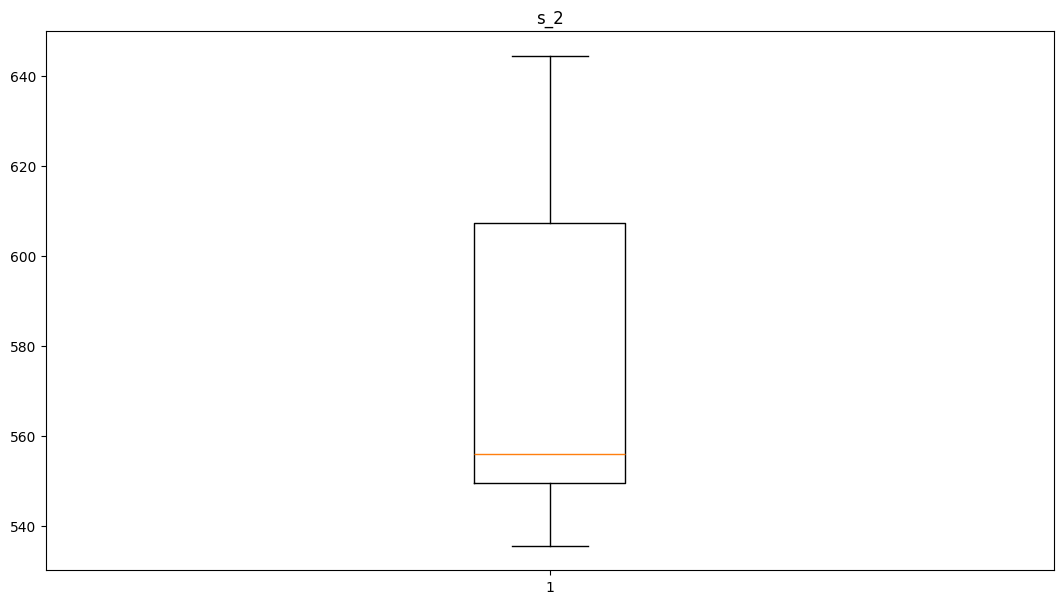

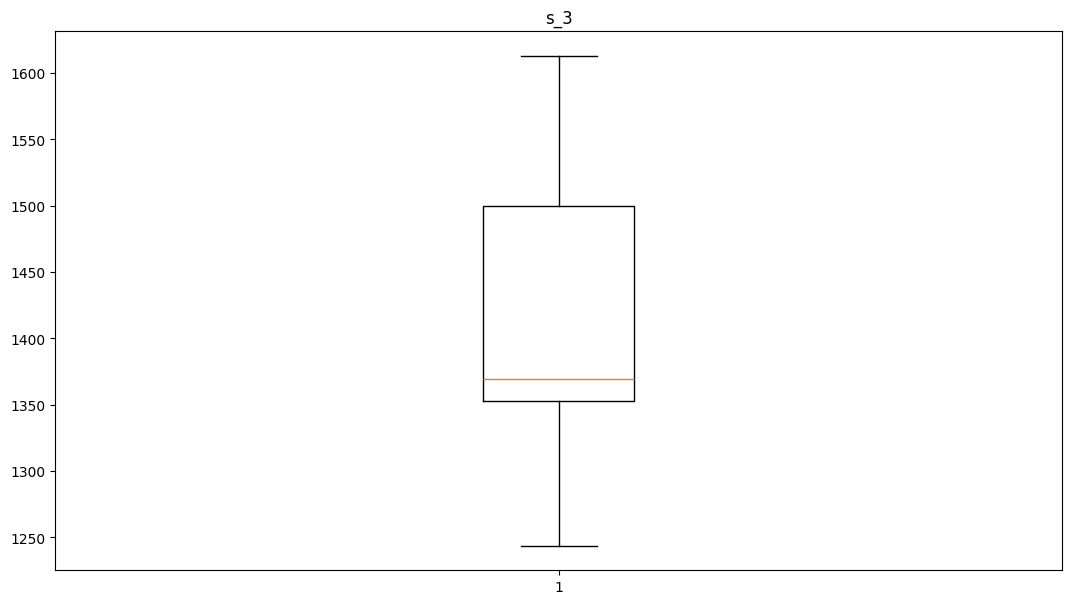

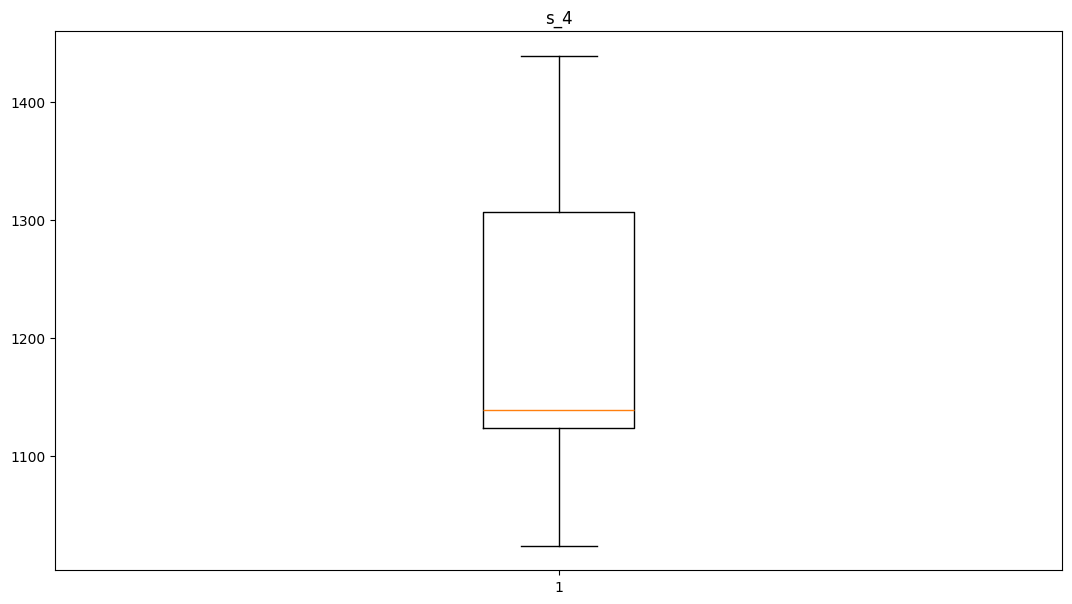

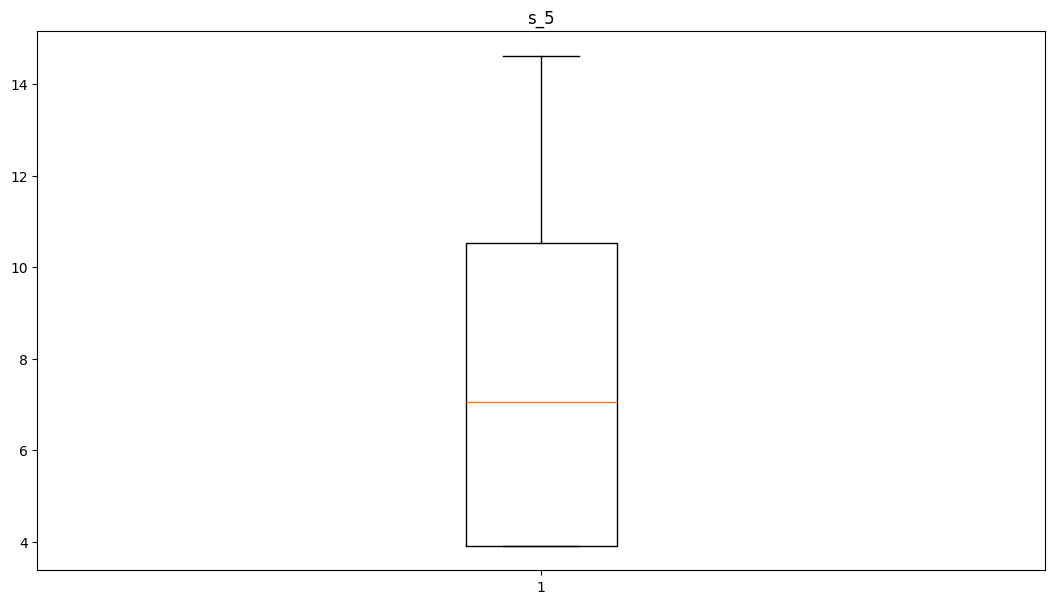

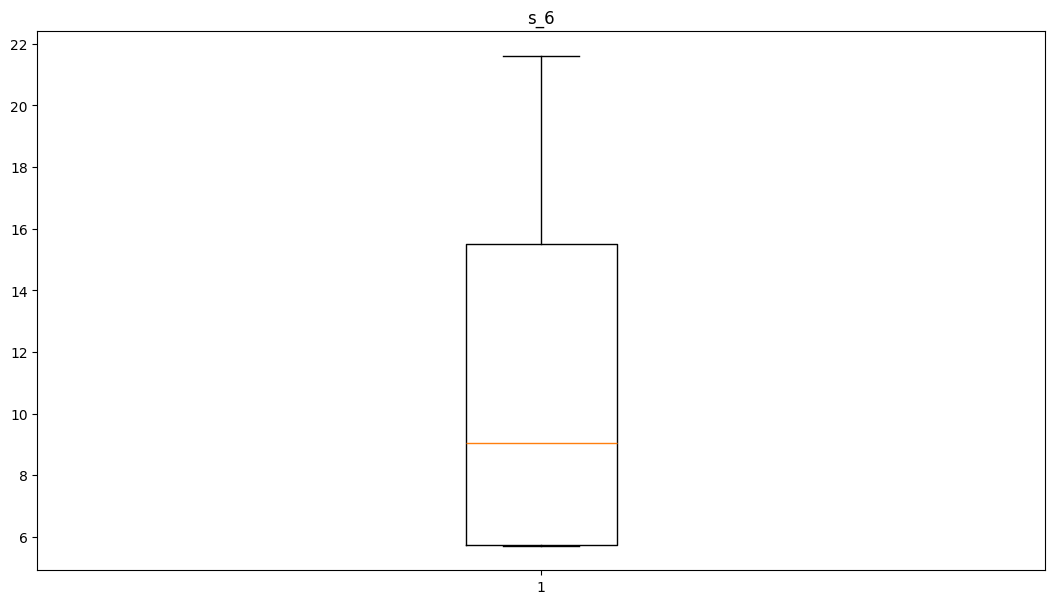

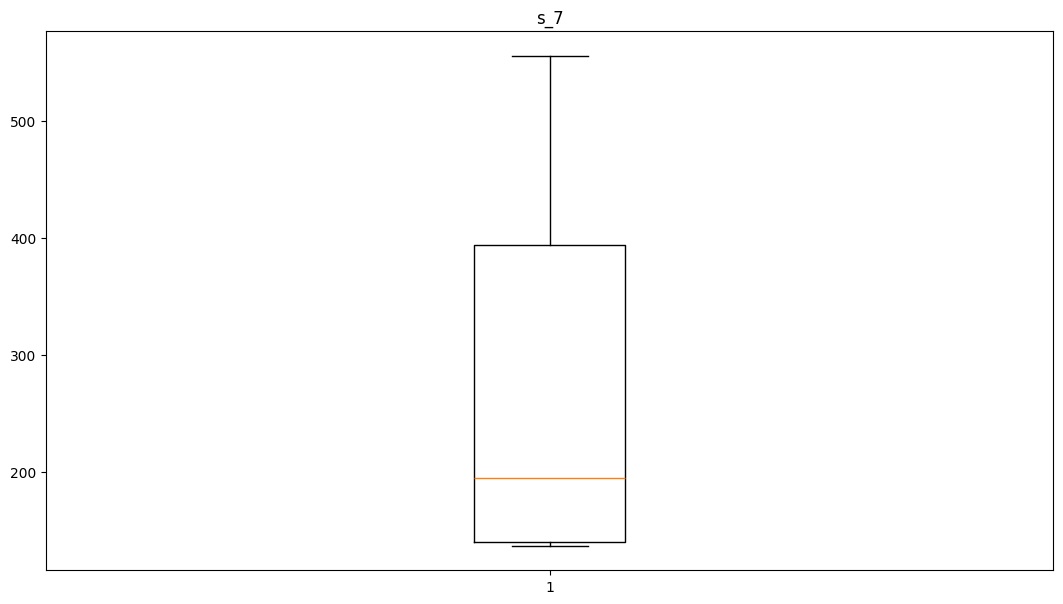

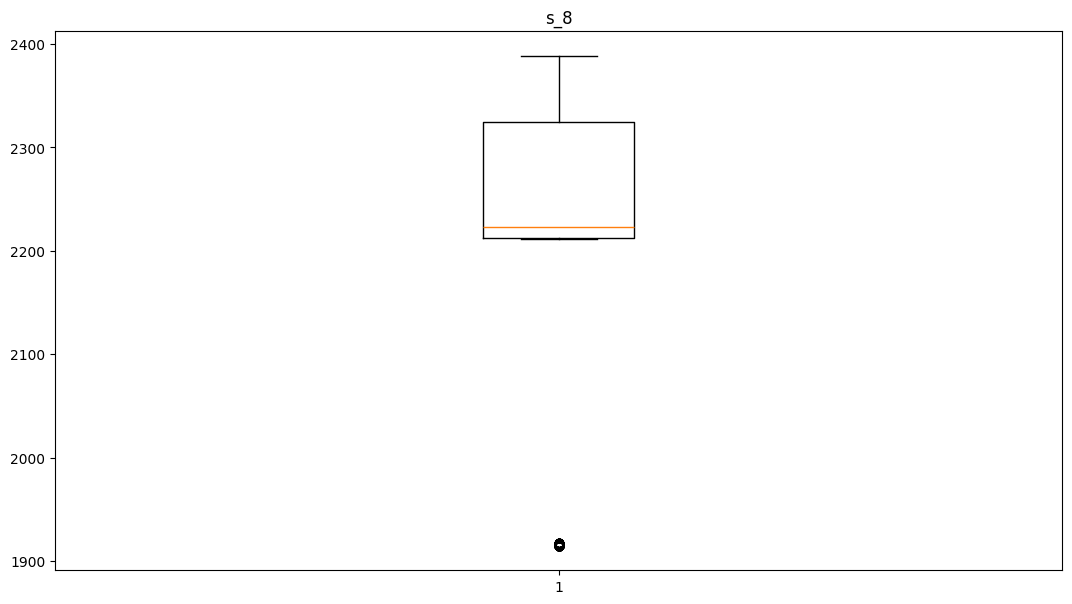

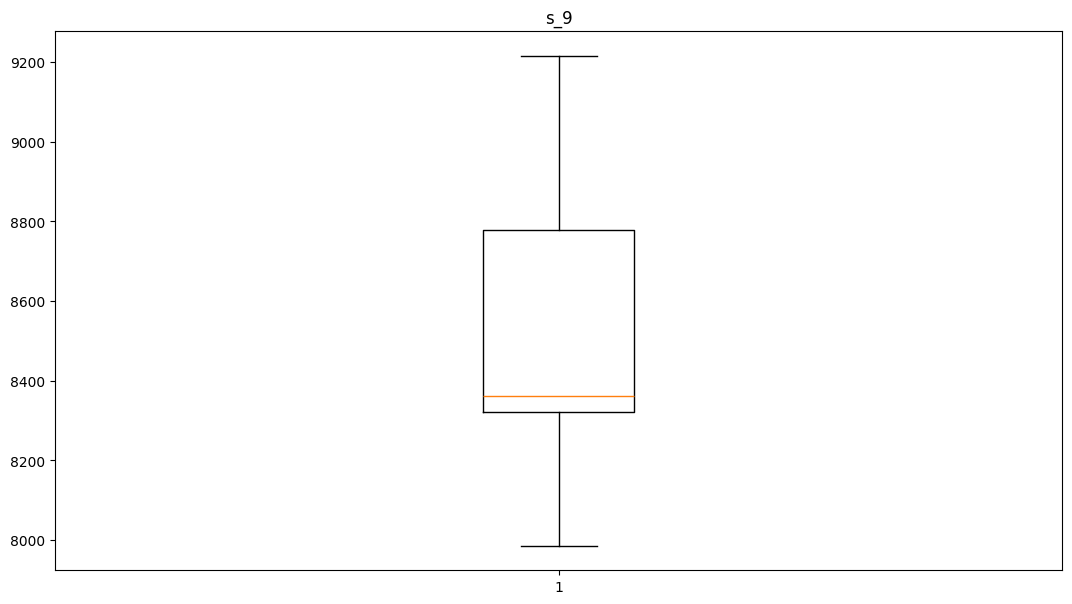

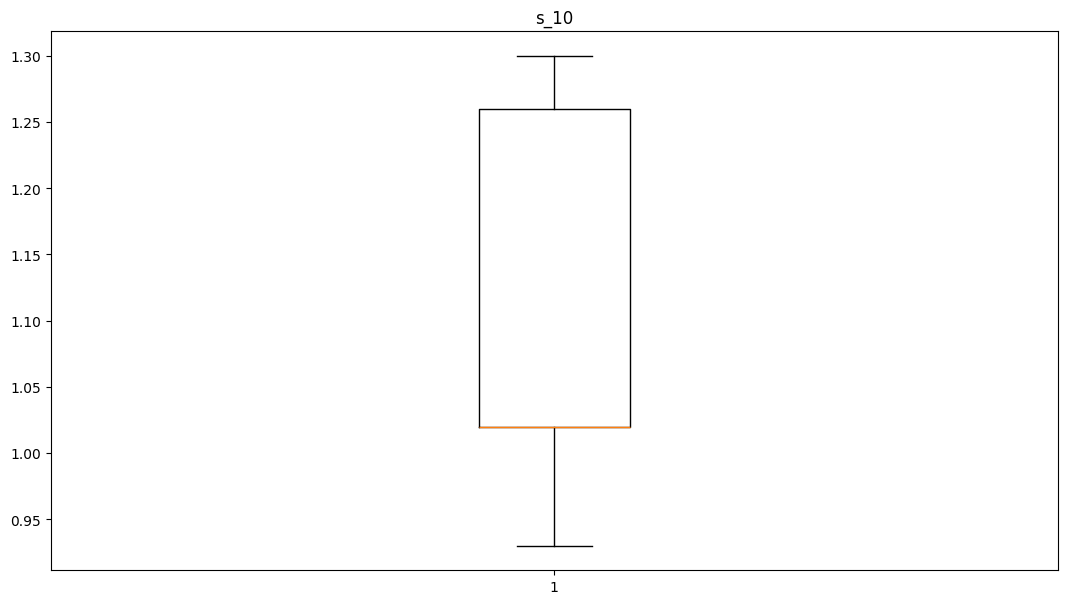

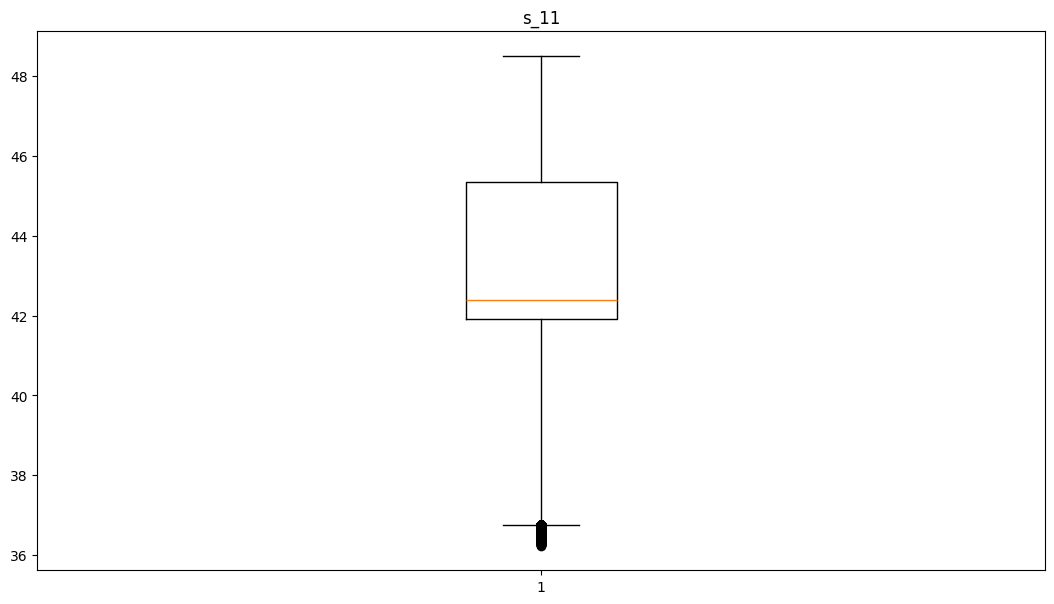

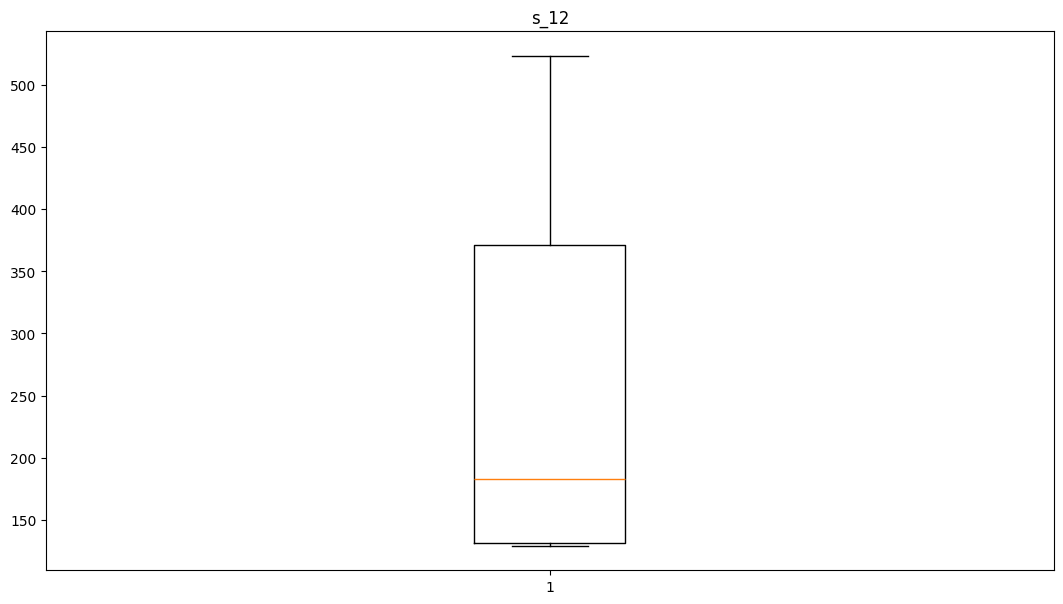

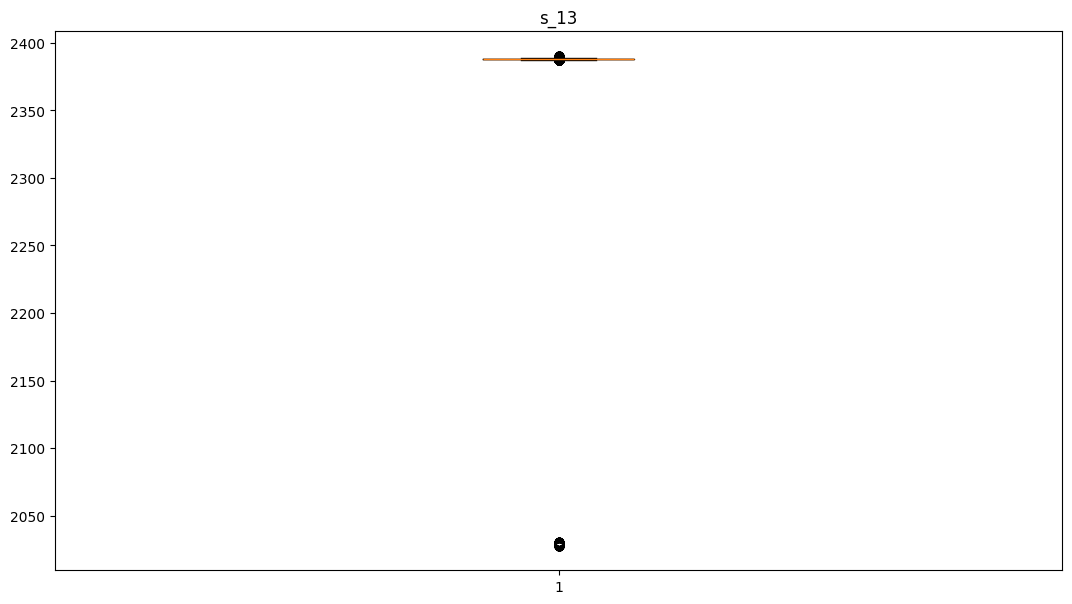

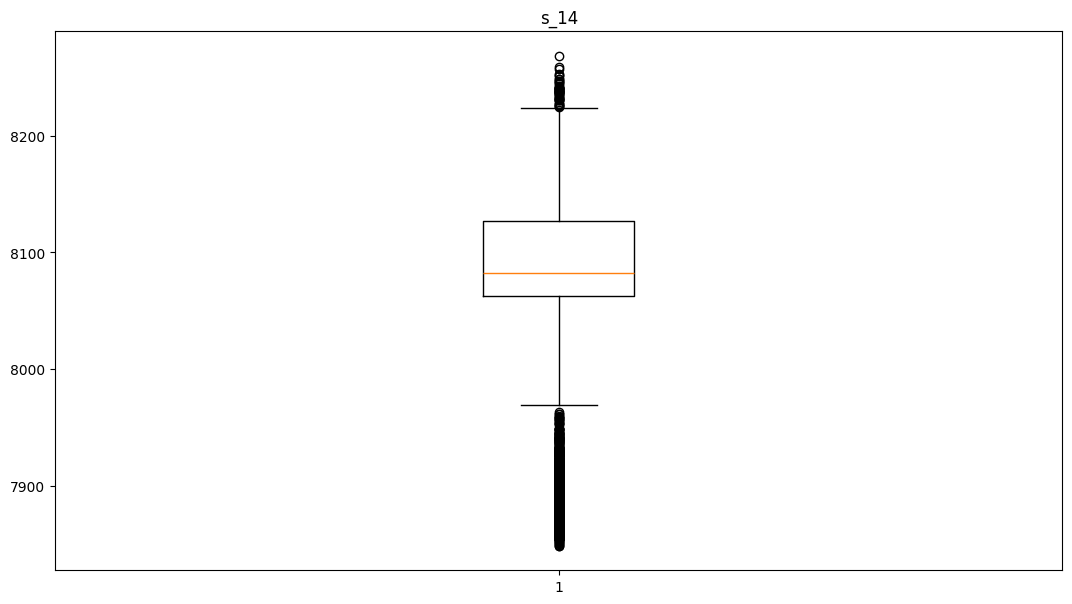

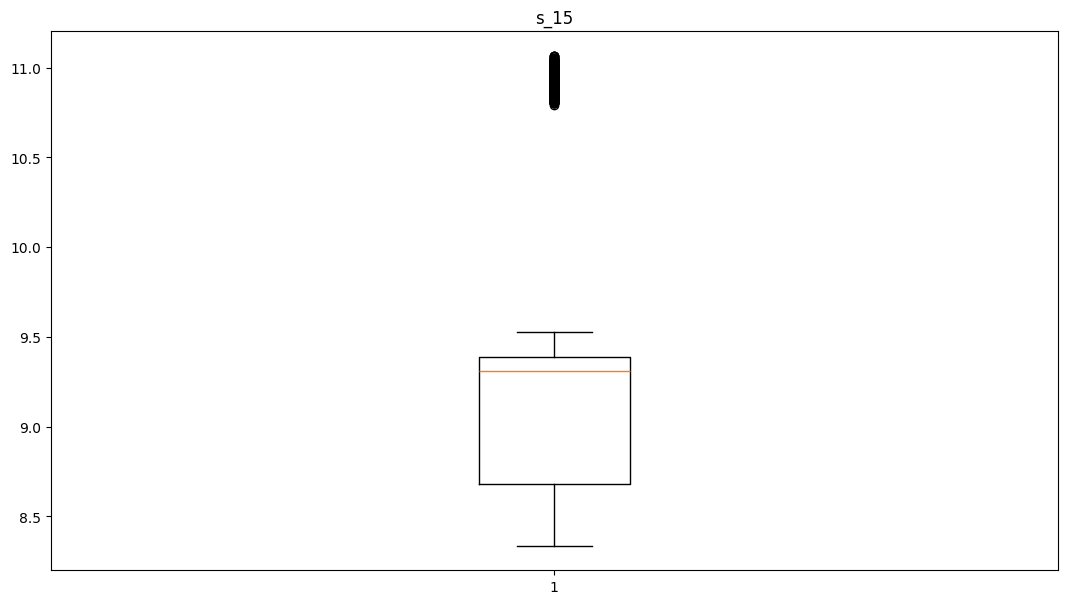

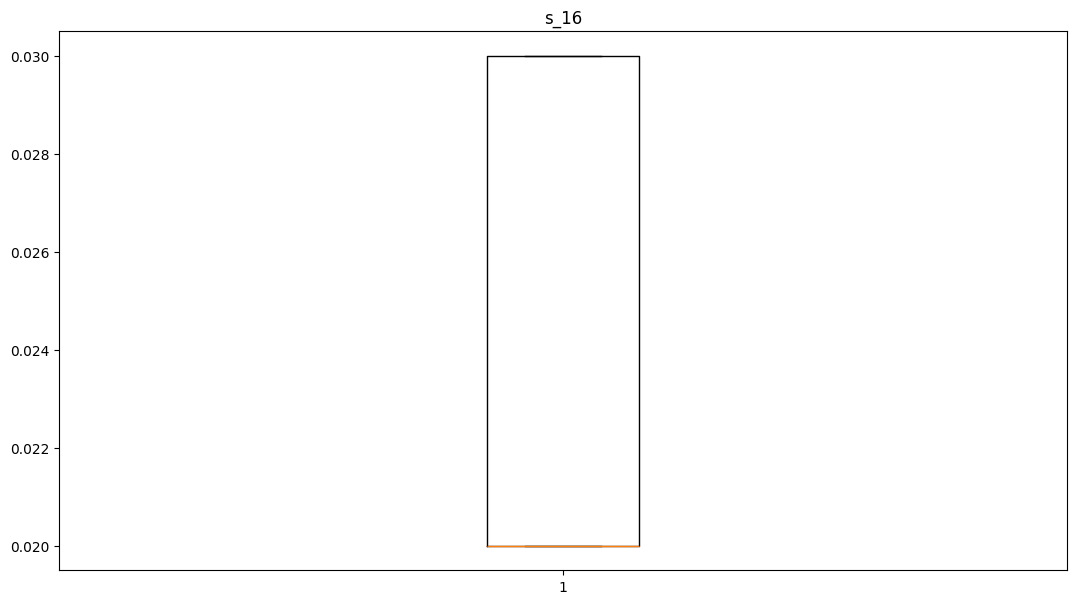

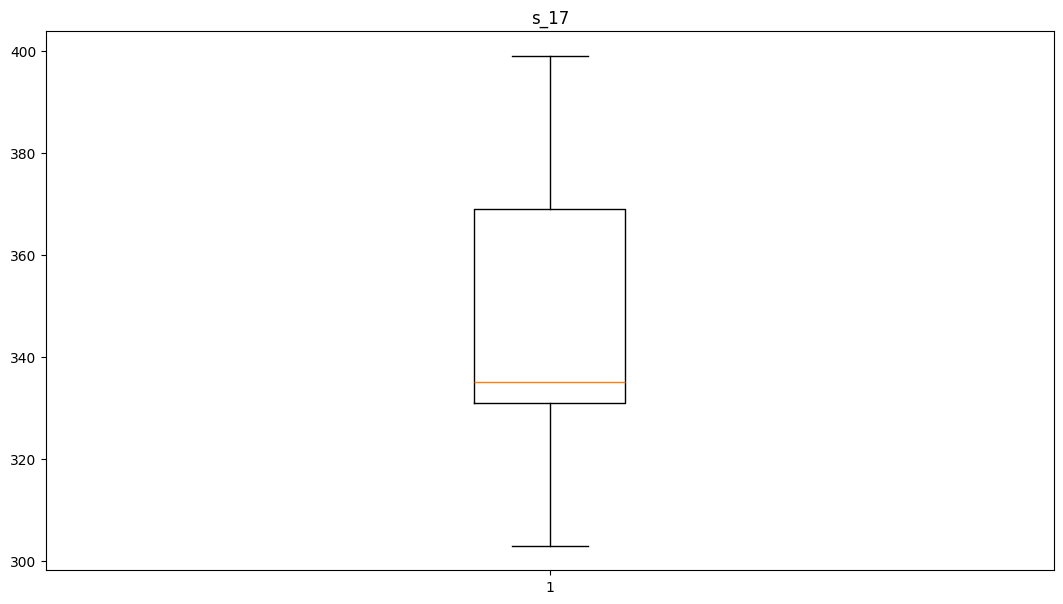

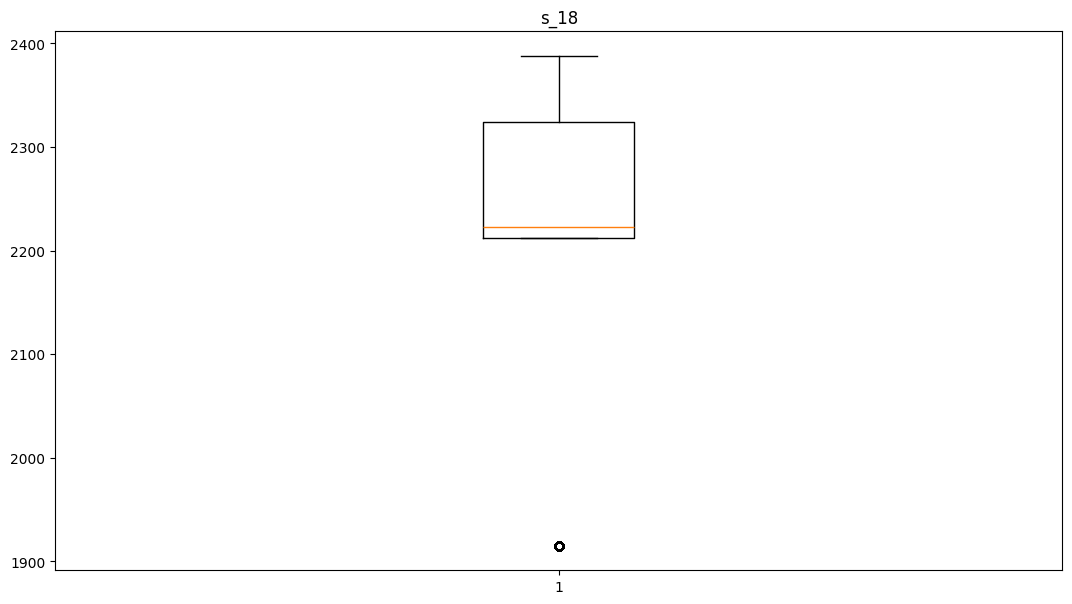

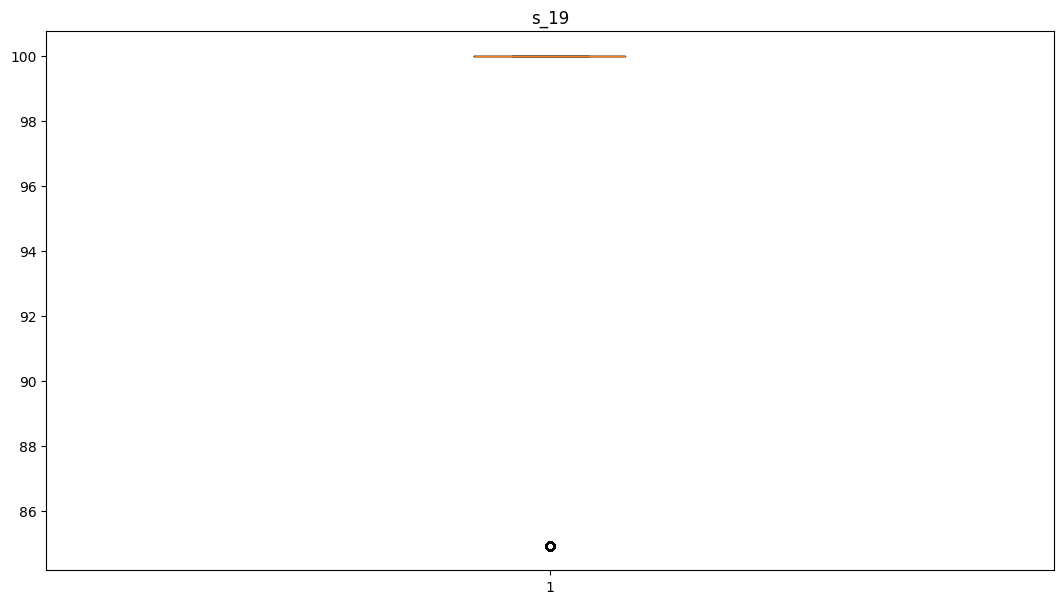

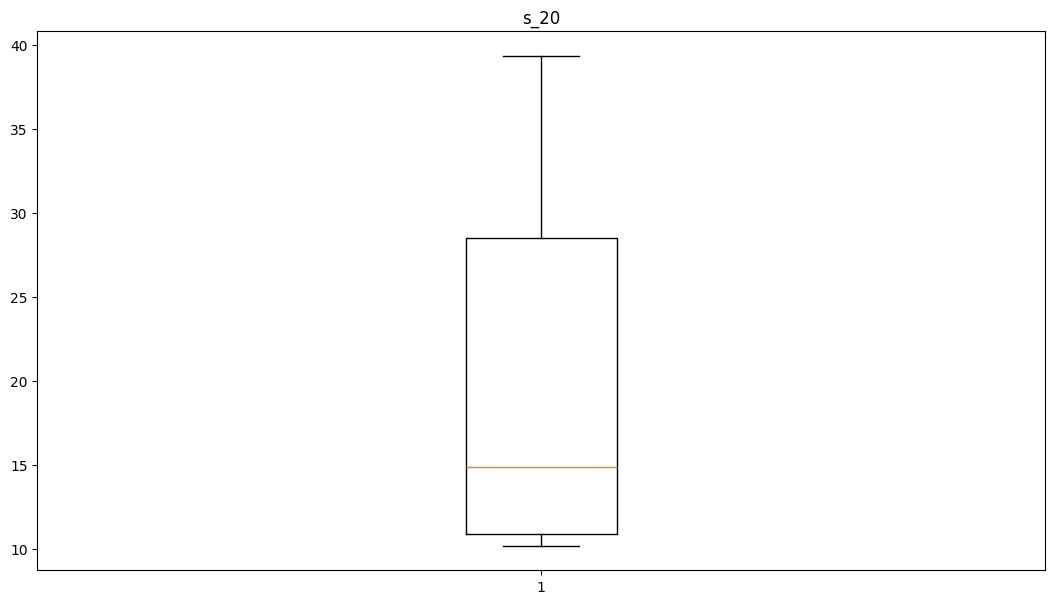

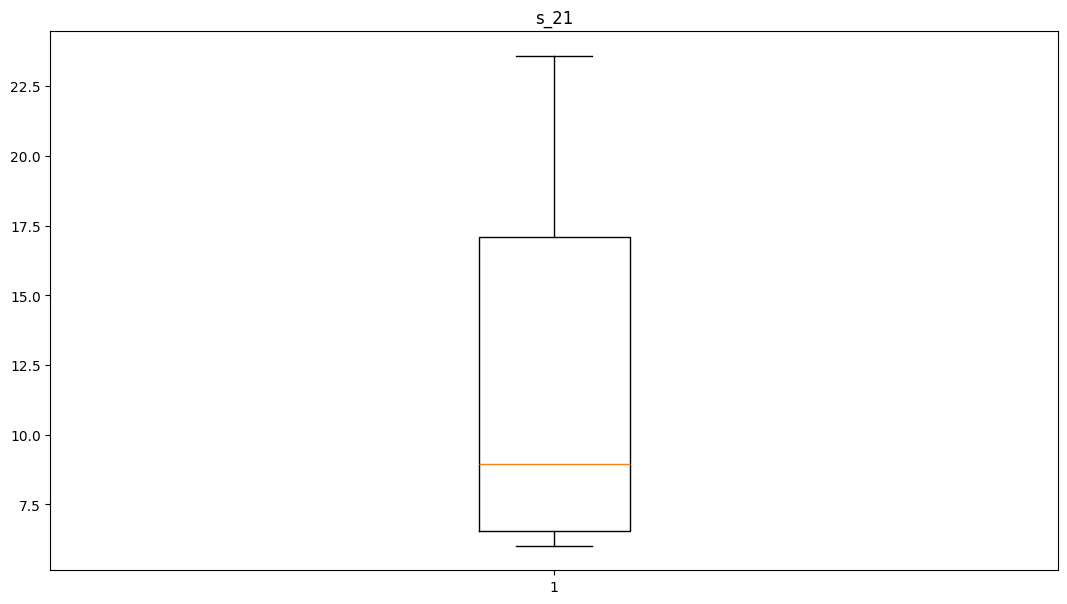

In [ ]:
for x in sensor_names:
    plt.figure(figsize=(13,7))
    plt.boxplot(train[x])
    plt.title(x)
    plt.show()

We can drop 13 & 19

In [ ]:
train['setting_1'].unique()

array([3.49983e+01, 4.19982e+01, 2.49988e+01, 4.20077e+01, 2.50005e+01,
       2.50045e+01, 4.20043e+01, 2.00020e+01, 4.19995e+01, 4.20011e+01,
       4.20029e+01, 1.50000e-03, 2.00003e+01, 4.20020e+01, 1.00038e+01,
       3.50053e+01, 2.50077e+01, 3.49996e+01, 4.20018e+01, 4.20028e+01,
       4.19987e+01, 4.20063e+01, 4.20001e+01, 2.50058e+01, 2.20000e-03,
       7.00000e-04, 2.00060e+01, 1.00050e+01, 2.80000e-03, 1.20000e-03,
       1.00066e+01, 2.50050e+01, 1.00076e+01, 2.49987e+01, 2.49981e+01,
       1.00065e+01, 2.50051e+01, 3.50029e+01, 4.20037e+01, 2.00000e-04,
       3.50033e+01, 4.20046e+01, 1.00049e+01, 4.00000e-04, 4.19986e+01,
       3.50059e+01, 2.49994e+01, 4.20015e+01, 1.00061e+01, 2.00000e-03,
       1.80000e-03, 2.00046e+01, 3.50031e+01, 4.20053e+01, 2.50020e+01,
       2.00011e+01, 2.90000e-03, 4.19992e+01, 3.50052e+01, 1.60000e-03,
       1.00015e+01, 0.00000e+00, 9.00000e-04, 4.20024e+01, 2.00074e+01,
       2.50057e+01, 2.50025e+01, 2.00033e+01, 2.50039e+01, 2.500

In [ ]:
from sklearn.model_selection import train_test_split
drop_labels = index_names+setting_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
#Conserve only the last occurence of each unit to match the length of y_valid
X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
#scaling X_valid
X_valid_s=scaler.fit_transform(X_valid)

In [ ]:
print(X_valid_s.shape)
print(y_valid.shape)

(259, 21)
(259, 1)


array([[<Axes: title={'center': 's_1'}>, <Axes: title={'center': 's_2'}>,
        <Axes: title={'center': 's_3'}>, <Axes: title={'center': 's_4'}>,
        <Axes: title={'center': 's_5'}>],
       [<Axes: title={'center': 's_6'}>, <Axes: title={'center': 's_7'}>,
        <Axes: title={'center': 's_8'}>, <Axes: title={'center': 's_9'}>,
        <Axes: title={'center': 's_10'}>],
       [<Axes: title={'center': 's_11'}>,
        <Axes: title={'center': 's_12'}>,
        <Axes: title={'center': 's_13'}>,
        <Axes: title={'center': 's_14'}>,
        <Axes: title={'center': 's_15'}>],
       [<Axes: title={'center': 's_16'}>,
        <Axes: title={'center': 's_17'}>,
        <Axes: title={'center': 's_18'}>,
        <Axes: title={'center': 's_19'}>,
        <Axes: title={'center': 's_20'}>],
       [<Axes: title={'center': 's_21'}>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

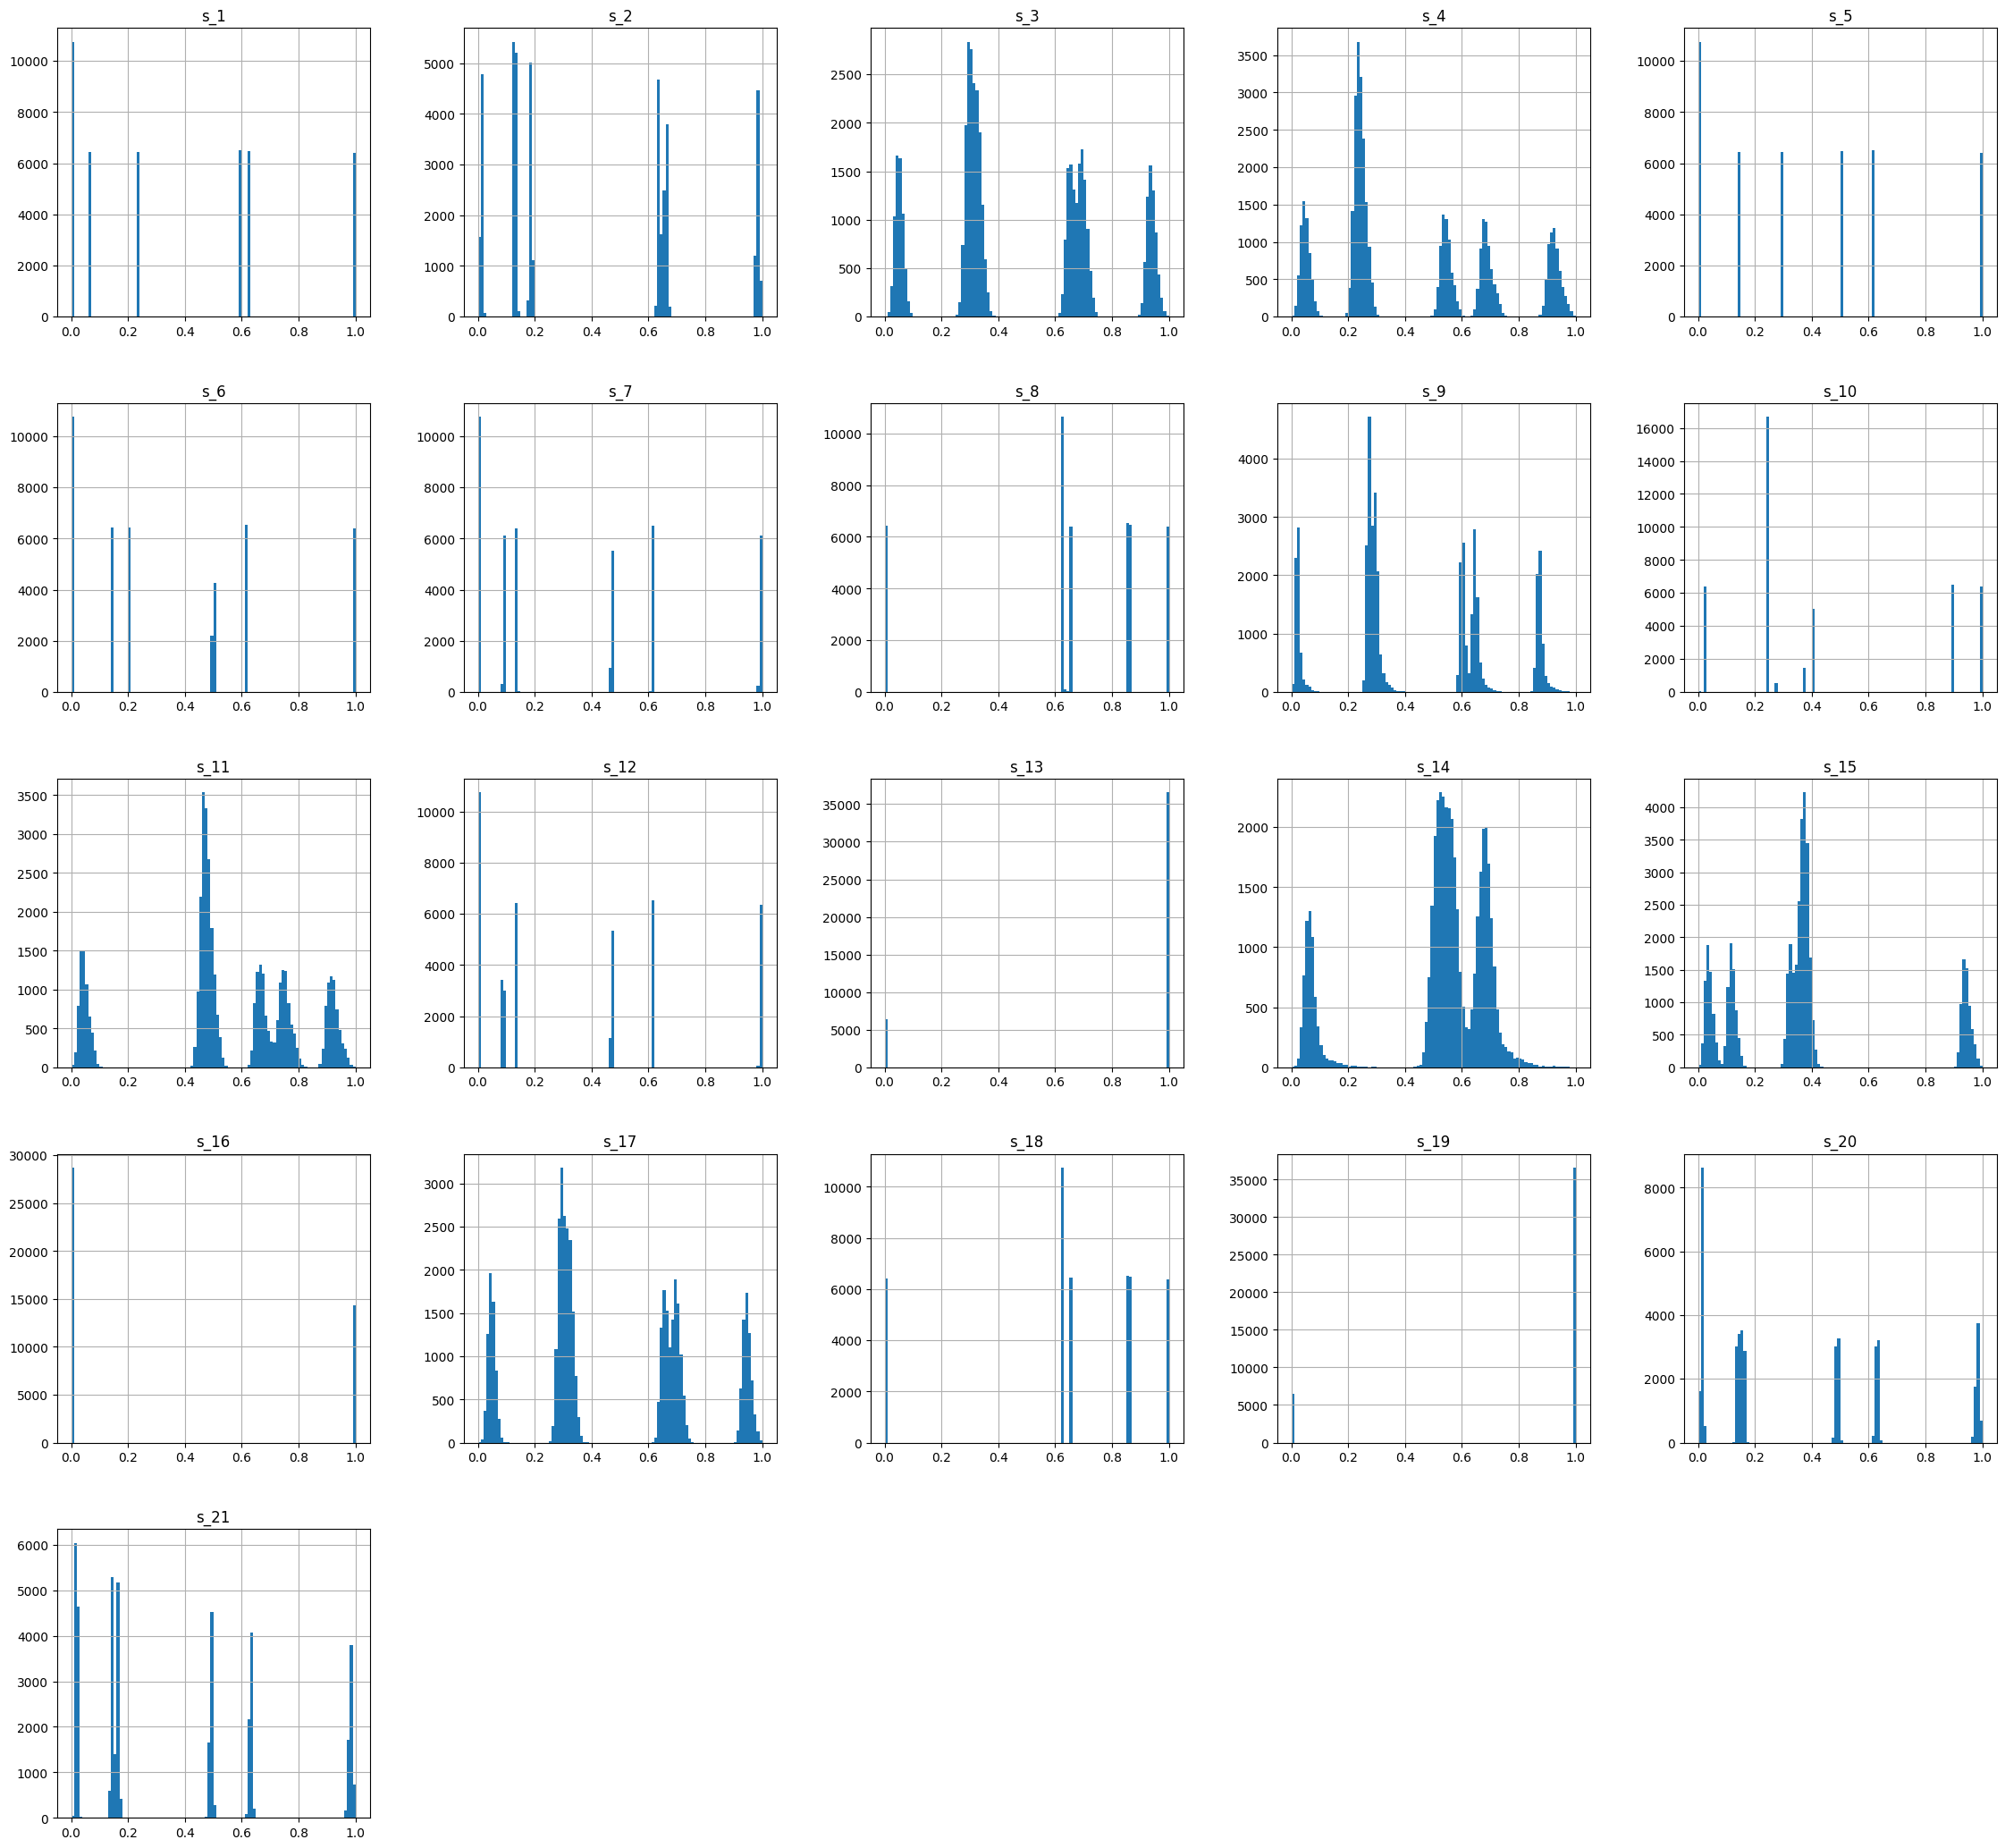

In [ ]:
sensor_names=['s_{}'.format(i) for i in range(1,22)]
pd.DataFrame(X_train_s,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(28,26))

In [ ]:
train['s_16'].unique()

array([0.02, 0.03])

In [ ]:
train['s_13'].unique()

array([2387.72, 2387.66, 2028.03, 2387.61, 2028.  , 2028.01, 2387.69,
       2387.99, 2387.62, 2387.64, 2388.16, 2388.04, 2388.14, 2387.76,
       2387.63, 2388.08, 2387.67, 2027.94, 2388.07, 2388.06, 2388.1 ,
       2388.13, 2388.15, 2027.95, 2387.65, 2387.74, 2388.23, 2388.12,
       2387.7 , 2387.77, 2027.98, 2388.21, 2388.05, 2387.59, 2387.75,
       2028.02, 2387.6 , 2387.79, 2388.11, 2388.19, 2387.57, 2388.01,
       2028.04, 2388.09, 2027.99, 2388.2 , 2387.58, 2387.78, 2387.68,
       2387.55, 2388.17, 2388.25, 2387.8 , 2388.03, 2388.18, 2387.83,
       2027.97, 2387.85, 2388.3 , 2388.31, 2388.28, 2388.4 , 2387.47,
       2388.29, 2388.34, 2387.71, 2388.32, 2388.43, 2387.4 , 2028.36,
       2028.39, 2388.  , 2388.02, 2028.37, 2028.35, 2028.4 , 2028.34,
       2028.32, 2028.3 , 2028.38, 2028.42, 2028.45, 2388.22, 2028.29,
       2388.24, 2028.33, 2028.31, 2388.26, 2028.41, 2388.27, 2028.44,
       2388.33, 2388.37, 2028.47, 2388.36, 2388.38, 2028.51, 2388.41,
       2388.42, 2028

In [ ]:
train['s_19'].unique()

array([100.  ,  84.93])

In [ ]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [ ]:
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score # Import the required functions

# 3. Hyperparameter tuning (FAST version)
pipe = Pipeline([('model', SVR())])

param_grid = {
    'model__C': [0.1, 1, 10],
    'model__epsilon': [0.01, 0.1],
    'model__kernel': ['rbf']
}

search = RandomizedSearchCV(pipe, param_grid,
                            n_iter=3, cv=2,
                            scoring='neg_mean_absolute_error',
                            random_state=42, n_jobs=-1)

search.fit(X_train_s, y_train)
print("Best params:", search.best_params_)

# 4. Evaluate on all 3 sets
best_svr = search.best_estimator_

y_svr_train = best_svr.predict(X_train_s)
y_svr_test = best_svr.predict(X_test_s)
y_svr_valid = best_svr.predict(X_valid_s)

print("Train metrics:")
score_svr=evaluate(y_train, y_svr_train, label='train')

print("\nTest metrics:")
score_svr_t=evaluate(y_test, y_svr_test, label='test')

print("\nValidation metrics:")
score_svr_v=evaluate(y_valid, y_svr_valid, label='valid')

Best params: {'model__kernel': 'rbf', 'model__epsilon': 0.1, 'model__C': 10}
Train metrics:
train set RMSE:49.22108881180886, R2:0.49622226333050246

Test metrics:
test set RMSE:54.31746362712121, R2:0.3712901501625909

Validation metrics:
valid set RMSE:36.91306459493061, R2:0.5288729017302147


In [ ]:
class Linear_Regression() :
    def __init__( self, lr=0.01, iterations=150 ) :
        self.lr = lr
        self.iterations = iterations
    def fit( self, X, Y ) :
        self.l, self.p = X.shape
        # weight initializer
        self.W = np.zeros( self.p )
        self.b = 0
        self.X = X
        self.Y = Y
        # gradientlearning
        for i in range( self.iterations ) :
            self.weight_updater()
        return self

    def weight_updater( self ) :
        Y_pred = self.predict( self.X )
        #  gradients
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.l
        db = - 2 * np.sum( self.Y - Y_pred ) / self.l
        # new weights assigned
        self.b = self.b - self.lr * db
        self.W = self.W - self.lr * dW
        return self

    def predict( self, X ) :
          # Y_pr=X.W+b
        return X.dot( self.W ) + self.b

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() #Instantiation
lr.fit(X=X_train_s,y=y_train) #Fitting

y_lr_train = lr.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_s)  #Prediction on test data
evaluate(y_test, y_lr_test, label='test')

y_lr_valid= lr.predict(X_valid_s) #Prediction on validation data
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:45.06260720325315, R2:0.5777504761227412
test set RMSE:48.31281894364742, R2:0.5026111372012876
valid set RMSE:40.99543647799877, R2:0.41890263148537077


In [ ]:
lr=Linear_Regression() #Instantiation
lr.fit(X=X_train_s, Y=y_train) #Fitting

y_lr_train = lr.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_s)  #Prediction on test data
evaluate(y_test, y_lr_test, label='test')

y_lr_valid= lr.predict(X_valid_s) #Prediction on validation data
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:70.82820391334378, R2:-0.04315536485859872
test set RMSE:69.98454552349054, R2:-0.043699783248107194
valid set RMSE:60.88536452000632, R2:-0.2817511044767258


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


# 2. Create Pipeline (Note: RandomForest doesn't need scaling, but keeping for consistency)
pipe = Pipeline([
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# 3. Optimized Parameter Grid (faster but still effective)
param_grid = {
    'model__n_estimators': [50, 100, 200],        # Reduced from [100, 200, 400]
    'model__max_depth': [10, 20, 30],             # Changed None to 30 (faster)
    'model__min_samples_split': [2, 5],           # Reduced from [2, 5, 10]
    'model__min_samples_leaf': [1, 2],            # Added for regularization
    'model__max_features': ['sqrt', 'log2']       # Added for better generalization
}

# 4. Fast Hyperparameter Tuning
search = RandomizedSearchCV(
    pipe,
    param_grid,
    n_iter=5,                                     # Reduced from 6
    cv=2,                                         # Reduced from 3 (faster)
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1                                     # Show progress
)

print("Starting hyperparameter tuning...")
search.fit(X_train_s, y_train)

# 5. Get best model
print("\nBest RandomForest params:", search.best_params_)
print(f"Best CV Score (MAE): {-search.best_score_:.4f}")

best_rf = search.best_estimator_

# 6. Comprehensive Evaluation on All 3 Sets
print("\n" + "="*60)
print("RANDOM FOREST - PERFORMANCE EVALUATION")
print("="*60)

# Train set
y_rf_train = best_rf.predict(X_train_s)
print("\n TRAIN SET:")
evaluate(y_train, y_rf_train, label='train')

# Test set
y_rf_test = best_rf.predict(X_test_s)
print("\n TEST SET:")
evaluate(y_test, y_rf_test, label='test')

# Validation set
y_rf_valid = best_rf.predict(X_valid_s)
print("\n VALIDATION SET:")
evaluate(y_valid, y_rf_valid, label='valid')






Starting hyperparameter tuning...
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Best RandomForest params: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 30}
Best CV Score (MAE): 31.3506

RANDOM FOREST - PERFORMANCE EVALUATION

 TRAIN SET:
train set RMSE:16.174488300181206, R2:0.9456001580050368

 TEST SET:
test set RMSE:59.662246464638436, R2:0.2414739442092929

 VALIDATION SET:
valid set RMSE:41.61618663640805, R2:0.40117152355208985


In [ ]:
# ============================================================================
# K-NEAREST NEIGHBORS (KNN)
# ============================================================================
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Create Pipeline
knn_pipe = Pipeline([
    ('model', KNeighborsRegressor(n_jobs=-1))
])

# Parameter Grid
knn_param_grid = {
    'model__n_neighbors': [3, 5, 7, 10, 15],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan'],
    'model__p': [1, 2]
}

# Hyperparameter Tuning
knn_search = RandomizedSearchCV(
    knn_pipe,
    knn_param_grid,
    n_iter=10,
    cv=2,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting hyperparameter tuning...")
knn_search.fit(X_train_s, y_train)

# Get best model
print("\nBest KNN params:", knn_search.best_params_)
print(f"Best CV Score (MAE): {-knn_search.best_score_:.4f}")

best_knn = knn_search.best_estimator_

# Comprehensive Evaluation on All 3 Sets
print("\n" + "="*60)
print("K-NEAREST NEIGHBORS - PERFORMANCE EVALUATION")
print("="*60)

# Train set
y_knn_train = best_knn.predict(X_train_s)
print("\n TRAIN SET:")
evaluate(y_train, y_knn_train, label='train')

# Test set
y_knn_test = best_knn.predict(X_test_s)
print("\n TEST SET:")
evaluate(y_test, y_knn_test, label='test')

# Validation set
y_knn_valid = best_knn.predict(X_valid_s)
print("\n VALIDATION SET:")
evaluate(y_valid, y_knn_valid, label='valid')

Starting hyperparameter tuning...
Fitting 2 folds for each of 10 candidates, totalling 20 fits

Best KNN params: {'model__weights': 'distance', 'model__p': 1, 'model__n_neighbors': 15, 'model__metric': 'manhattan'}
Best CV Score (MAE): 32.6095

K-NEAREST NEIGHBORS - PERFORMANCE EVALUATION

 TRAIN SET:
train set RMSE:0.0, R2:1.0

 TEST SET:
test set RMSE:55.20010974334154, R2:0.35069135936427187

 VALIDATION SET:
valid set RMSE:50.38266696210944, R2:0.1223119509294811


In [ ]:
# ============================================================================
# XGBOOST
# ============================================================================
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Create Pipeline
xgb_pipe = Pipeline([
    ('model', XGBRegressor(random_state=42, n_jobs=-1))
])

# Parameter Grid
xgb_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0],
    'model__min_child_weight': [1, 3, 5]
}

# Hyperparameter Tuning
xgb_search = RandomizedSearchCV(
    xgb_pipe,
    xgb_param_grid,
    n_iter=10,
    cv=2,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting hyperparameter tuning...")
xgb_search.fit(X_train_s, y_train)

# Get best model
print("\nBest XGBoost params:", xgb_search.best_params_)
print(f"Best CV Score (MAE): {-xgb_search.best_score_:.4f}")

best_xgb = xgb_search.best_estimator_

# Comprehensive Evaluation on All 3 Sets
print("\n" + "="*60)
print("XGBOOST - PERFORMANCE EVALUATION")
print("="*60)

# Train set
y_xgb_train = best_xgb.predict(X_train_s)
print("\n TRAIN SET:")
evaluate(y_train, y_xgb_train, label='train')

# Test set
y_xgb_test = best_xgb.predict(X_test_s)
print("\n TEST SET:")
evaluate(y_test, y_xgb_test, label='test')

# Validation set
y_xgb_valid = best_xgb.predict(X_valid_s)
print("\n VALIDATION SET:")
evaluate(y_valid, y_xgb_valid, label='valid')

Starting hyperparameter tuning...
Fitting 2 folds for each of 10 candidates, totalling 20 fits

Best XGBoost params: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__min_child_weight': 3, 'model__max_depth': 7, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.7}
Best CV Score (MAE): 31.6390

XGBOOST - PERFORMANCE EVALUATION

 TRAIN SET:
train set RMSE:38.31941018942783, R2:0.6946666836738586

 TEST SET:
test set RMSE:69.04136059389509, R2:-0.015757441520690918

 VALIDATION SET:
valid set RMSE:54.28047639057251, R2:-0.018744349479675293


In [ ]:
# ============================================================================
# ADABOOST
# ============================================================================
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Create Pipeline
ada_pipe = Pipeline([
    ('model', AdaBoostRegressor(random_state=42))
])

# Parameter Grid
ada_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'model__loss': ['linear', 'square', 'exponential']
}

# Hyperparameter Tuning
ada_search = RandomizedSearchCV(
    ada_pipe,
    ada_param_grid,
    n_iter=8,
    cv=2,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting hyperparameter tuning...")
ada_search.fit(X_train_s, y_train)

# Get best model
print("\nBest AdaBoost params:", ada_search.best_params_)
print(f"Best CV Score (MAE): {-ada_search.best_score_:.4f}")

best_ada = ada_search.best_estimator_

# Comprehensive Evaluation on All 3 Sets
print("\n" + "="*60)
print("ADABOOST - PERFORMANCE EVALUATION")
print("="*60)

# Train set
y_ada_train = best_ada.predict(X_train_s)
print("\n TRAIN SET:")
evaluate(y_train, y_ada_train, label='train')

# Test set
y_ada_test = best_ada.predict(X_test_s)
print("\n TEST SET:")
evaluate(y_test, y_ada_test, label='test')

# Validation set
y_ada_valid = best_ada.predict(X_valid_s)
print("\n VALIDATION SET:")
evaluate(y_valid, y_ada_valid, label='valid')

Starting hyperparameter tuning...
Fitting 2 folds for each of 8 candidates, totalling 16 fits

Best AdaBoost params: {'model__n_estimators': 100, 'model__loss': 'exponential', 'model__learning_rate': 0.1}
Best CV Score (MAE): 43.8895

ADABOOST - PERFORMANCE EVALUATION

 TRAIN SET:
train set RMSE:53.55885808647834, R2:0.4035155093020816

 TEST SET:
test set RMSE:78.1053939421737, R2:-0.29997007286983934

 VALIDATION SET:
valid set RMSE:57.467118918552224, R2:-0.14187017213939979
